In [64]:
import os
import dotenv
import zipfile
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from IPython.display import display, HTML
import json

In [6]:
dotenv.load_dotenv()

# Load Kaggle API keys
os.environ['KAGGLE_USERNAME'] = os.environ.get("KAGGLE_USER_NAME")
os.environ['KAGGLE_KEY']  = os.environ.get("KAGGLE_API_KEY")


In [7]:
!kaggle datasets download -d juhibhojani/airline-reviews -p ./kaggle/data


  0%|          | 0.00/6.52M [00:00<?, ?B/s]
 31%|###       | 2.00M/6.52M [00:00<00:00, 20.3MB/s]
100%|##########| 6.52M/6.52M [00:00<00:00, 29.7MB/s]


In [11]:
zip_file_path = "./kaggle/data/airline-reviews.zip"
extraction_directory = "./kaggle/data/"

if os.path.exists(zip_file_path):
    # Create a ZipFile object
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents into the directory
        zip_ref.extractall(extraction_directory)
    print("File unzipped successfully.")
else:
    print("Zip file does not exist.")
    
    

File unzipped successfully.


In [2]:
# Load the dataset
file_path = './kaggle/data/Airline_review.csv'
airline_review_df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the DataFrame
print(airline_review_df.head())

   Unnamed: 0   Airline Name Overall_Rating  \
0           0    AB Aviation              9   
1           1    AB Aviation              1   
2           2    AB Aviation              1   
3           3  Adria Airways              1   
4           4  Adria Airways              1   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   
4  "it ruined our last days of holidays"  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an... 

In [7]:
print(airline_review_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [6]:
print(airline_review_df.describe()) 

        Unnamed: 0  Seat Comfort  Cabin Staff Service  Food & Beverages  \
count  23171.00000  19016.000000         18911.000000      14500.000000   
mean   11585.00000      2.618374             2.871609          2.553586   
std     6689.03588      1.464840             1.604631          1.526314   
min        0.00000      0.000000             0.000000          0.000000   
25%     5792.50000      1.000000             1.000000          1.000000   
50%    11585.00000      3.000000             3.000000          2.000000   
75%    17377.50000      4.000000             4.000000          4.000000   
max    23170.00000      5.000000             5.000000          5.000000   

       Ground Service  Inflight Entertainment  Wifi & Connectivity  \
count    18378.000000            10829.000000          5920.000000   
mean         2.353738                2.179056             1.780405   
std          1.595747                1.488839             1.318800   
min          1.000000                0.00000

In [4]:
profile = ProfileReport(airline_review_df,minimal=True)

In [5]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
review_counts = airline_review_df['Airline Name'].value_counts().reset_index()
review_counts.columns = ['Airline Name', 'Review Count']

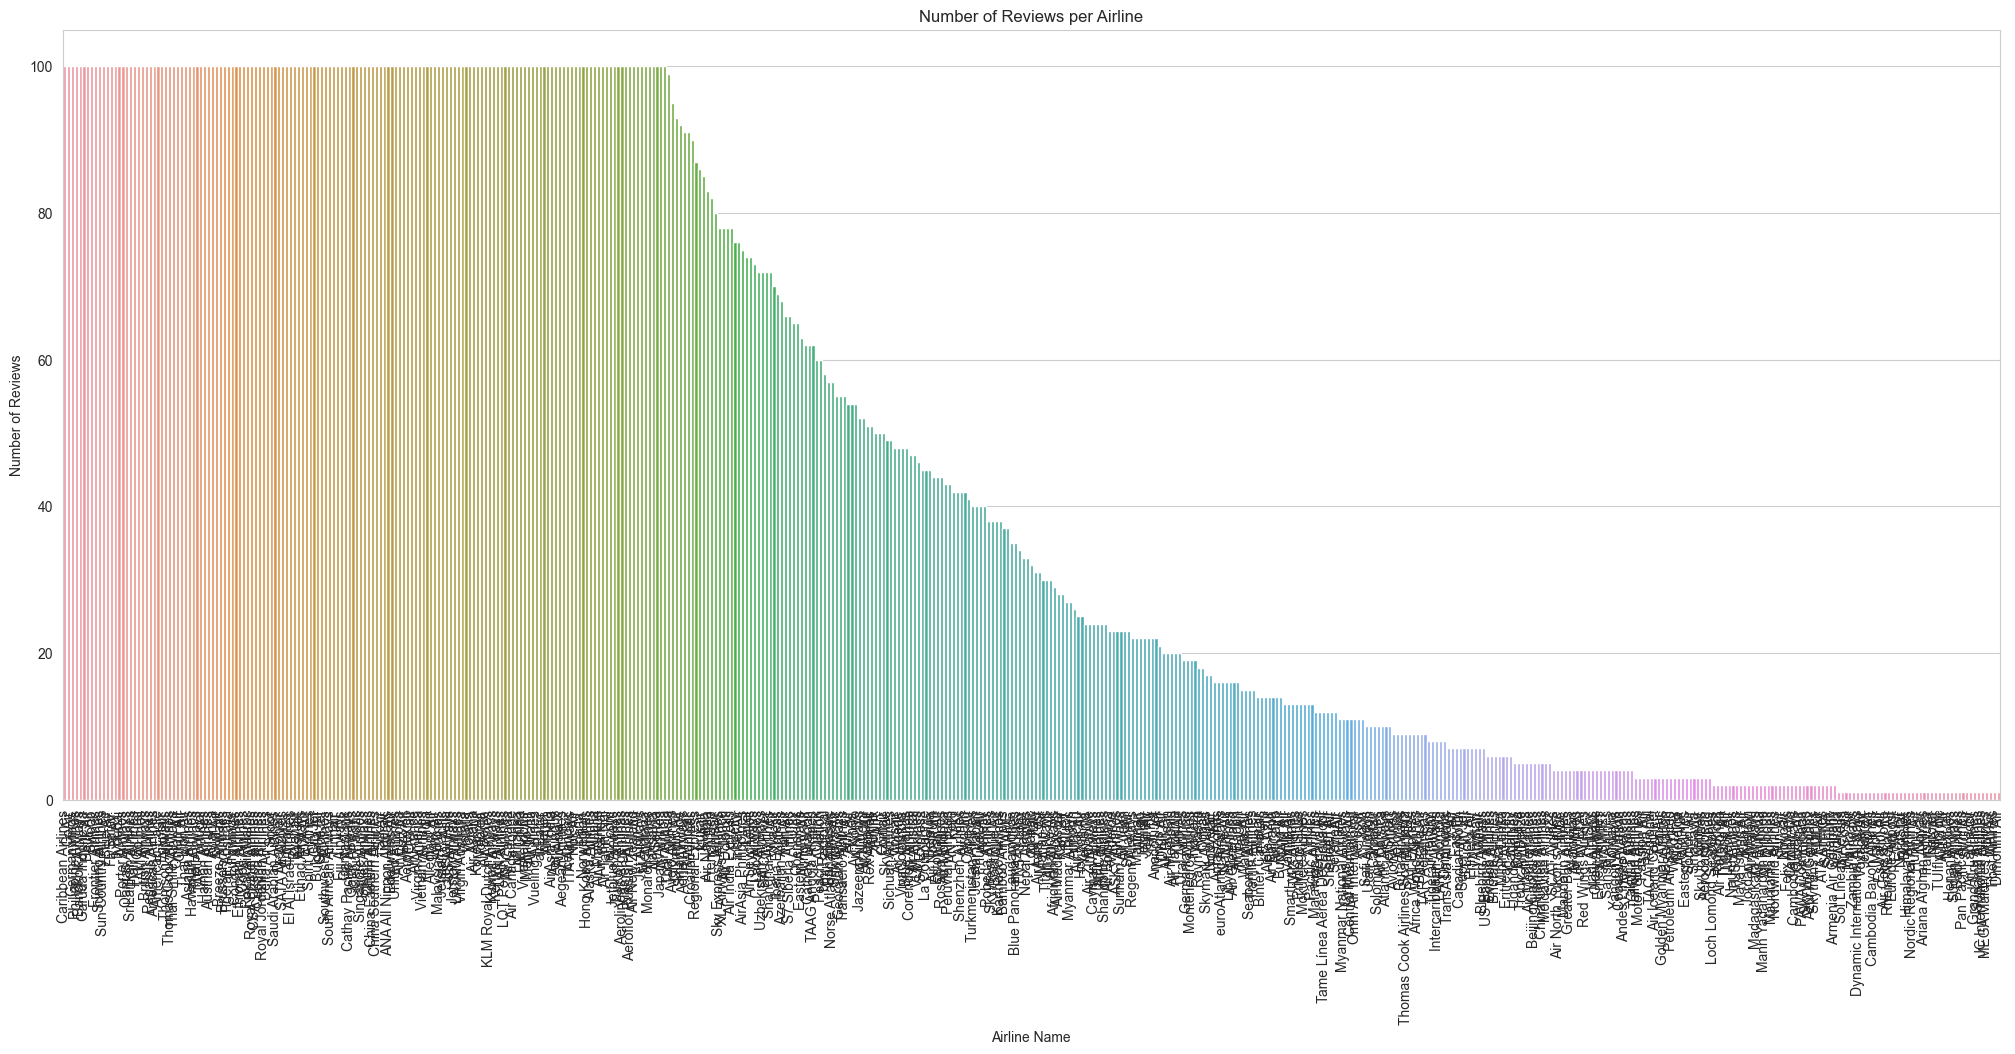

In [15]:
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(25, 10))  
sns.barplot(data=review_counts, x='Airline Name', y='Review Count')

plt.xticks(rotation=90)  
plt.title('Number of Reviews per Airline')
plt.ylabel('Number of Reviews')
plt.xlabel('Airline Name')

plt.show()


In [25]:
print(review_counts.to_string(index=False))

                    Airline Name  Review Count
              Caribbean Airlines           100
                           GoAir           100
                     Germanwings           100
             Philippine Airlines           100
                 Bangkok Airways           100
                Garuda Indonesia           100
                       Batik Air           100
                           Swoop           100
               Frontier Airlines           100
                Sunwing Airlines           100
            Sun Country Airlines           100
                        Blue Air           100
                       FlySafair           100
                            PLAY           100
                        flydubai           100
                 Porter Airlines           100
                  Qantas Airways           100
              SriLankan Airlines           100
                  Flair Airlines           100
                        Go First           100
             

In [50]:
max_review_count = max(review_counts['Review Count'])
bin_limit = max_review_count + 1 if max_review_count % 10 != 0 else max_review_count
bins = range(0, bin_limit + 20, 10)
labels = [f'{i}-{i+9}' for i in range(0, bin_limit+ 9, 10)]

review_counts['Binned'] = pd.cut(review_counts['Review Count'], bins=bins, labels=labels, right=False)

# Count how many airlines fall into each bin
binned_counts = review_counts.groupby('Binned', observed=True).size().reset_index(name='Number of Airlines')


C:\Users\alok_\OneDrive\Learning\Machine Learning\Airline_Industry_Competitive_Analysis\.venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


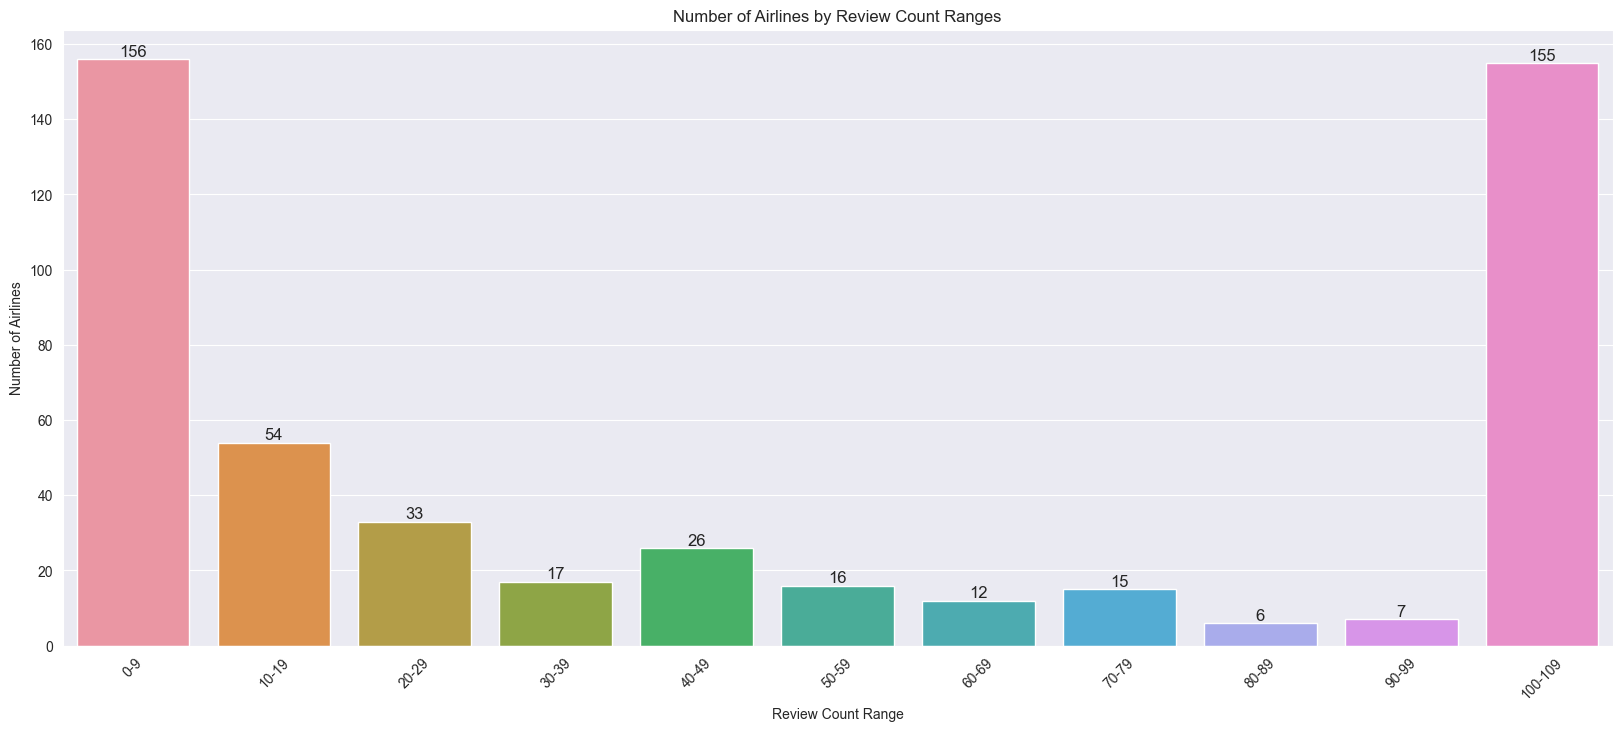

In [51]:
sns.set_style("darkgrid")

# Create the plot
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=binned_counts, x='Binned', y='Number of Airlines')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, ha='center', va='bottom')
    

plt.xticks(rotation=45)
plt.title('Number of Airlines by Review Count Ranges')
plt.ylabel('Number of Airlines')
plt.xlabel('Review Count Range')

plt.show()

In [53]:

columns_to_drop = ['Unnamed: 0', 'Overall_Rating', 'Review_Title', 'Review Date', 'Verified', 'Route', 'Date Flown']

# Creating a new DataFrame without these columns
filtered_airline_review_df = airline_review_df.drop(columns=columns_to_drop)

# Display the first few rows of the new DataFrame
print(filtered_airline_review_df.head())


    Airline Name                                             Review  \
0    AB Aviation    Moroni to Moheli. Turned out to be a pretty ...   
1    AB Aviation   Moroni to Anjouan. It is a very small airline...   
2    AB Aviation    Anjouan to Dzaoudzi. A very small airline an...   
3  Adria Airways    Please do a favor yourself and do not fly wi...   
4  Adria Airways   Do not book a flight with this airline! My fr...   

        Aircraft Type Of Traveller      Seat Type  Seat Comfort  \
0            NaN      Solo Leisure  Economy Class           4.0   
1           E120      Solo Leisure  Economy Class           2.0   
2  Embraer E120       Solo Leisure  Economy Class           2.0   
3            NaN      Solo Leisure  Economy Class           1.0   
4            NaN    Couple Leisure  Economy Class           1.0   

   Cabin Staff Service  Food & Beverages  Ground Service  \
0                  5.0               4.0             4.0   
1                  2.0               1.0          

In [58]:
review_counts_airlines = filtered_airline_review_df['Airline Name'].value_counts()


In [59]:
airlines_with_30_or_more_reviews = review_counts_airlines[review_counts_airlines >= 30].index.tolist()
airlines_with_30_or_more_reviews_filtered_df = filtered_airline_review_df[filtered_airline_review_df['Airline Name'].isin(airlines_with_30_or_more_reviews)]

In [60]:
print(airlines_with_30_or_more_reviews_filtered_df.head())

    Airline Name                                             Review  \
3  Adria Airways    Please do a favor yourself and do not fly wi...   
4  Adria Airways   Do not book a flight with this airline! My fr...   
5  Adria Airways    Had very bad experience with rerouted and ca...   
6  Adria Airways    Ljubljana to Zürich. Firstly, Ljubljana airp...   
7  Adria Airways    First of all, I am not complaining about a s...   

         Aircraft Type Of Traveller      Seat Type  Seat Comfort  \
3             NaN      Solo Leisure  Economy Class           1.0   
4             NaN    Couple Leisure  Economy Class           1.0   
5          CR 900    Couple Leisure  Economy Class           1.0   
6             NaN          Business  Economy Class           1.0   
7  Bombardier CRJ      Solo Leisure  Economy Class           1.0   

   Cabin Staff Service  Food & Beverages  Ground Service  \
3                  1.0               NaN             1.0   
4                  1.0               1.0    

In [61]:
# Save to a CSV file
airlines_with_30_or_more_reviews_filtered_df.to_csv('./kaggle/data/airlines_with_30_plus_reviews_cleaned.csv', index=False)

In [65]:
# Grouping the DataFrame by 'Airline Name'
grouped = airlines_with_30_or_more_reviews_filtered_df.groupby('Airline Name')

# Creating a new dictionary to store the nested data
nested_data = {}

for name, group in grouped:
    # Convert each group to a dictionary and remove the 'Airline Name' column
    group_dict = group.drop('Airline Name', axis=1).to_dict(orient='records')
    nested_data[name] = group_dict
    
    
# Convert the nested data to JSON
json_data = json.dumps(nested_data, indent=4)


jason_file_name = './kaggle/data/airlines_with_30_plus_reviews_cleaned_1.json'
# Optionally, write to a JSON file
with open(jason_file_name, 'w') as f:
    f.write(json_data)

    
